In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


In [2]:
import os
import json

path="experiments_gan"
results = []
for el in os.listdir(path):
    if el.endswith("report.json"):
        with open(path+"/"+el) as f:
            report = json.load(f)
            report["filename"] = el
            results.append(report)


res_df = pd.json_normalize(results, sep='.')
res_df["iters"] = res_df["trajectory"].apply(len)
res_df = res_df.sort_values(by=['run'])
res_df

,experiment_name,run,trajectory,best_loss_g,best_loss_d,filename,iters
1,simple_conv_gan,1,"[{'epoch': 0, 'iteration': 1, 'd_loss': 1.3863...",0.693147,0.693147,simpleconvgan_1_report.json,11850
2,simple_conv_gan,2,"[{'epoch': 0, 'iteration': 1, 'd_loss': 1.3875...",0.693147,0.693147,simpleconvgan_2_report.json,11850
3,simple_conv_gan,3,"[{'epoch': 0, 'iteration': 1, 'd_loss': 1.3904...",0.777475,0.653822,simpleconvgan_3_report.json,11850
4,simple_conv_gan,4,"[{'epoch': 0, 'iteration': 1, 'd_loss': 1.3869...",0.693147,0.693147,simpleconvgan_4_report.json,11850
5,simple_conv_gan,5,"[{'epoch': 0, 'iteration': 1, 'd_loss': 1.3859...",0.693147,0.693147,simpleconvgan_5_report.json,11850
6,simple_conv_gan,6,"[{'epoch': 0, 'iteration': 1, 'd_loss': 1.3894...",0.693147,0.693147,simpleconvgan_6_report.json,11850
7,simple_conv_gan,7,"[{'epoch': 0, 'iteration': 1, 'd_loss': 1.3893...",0.693147,0.693147,simpleconvgan_7_report.json,11850
8,simple_conv_gan,8,"[{'epoch': 0, 'iteration': 1, 'd_loss': 1.3856...",0.693147,0.693147,simpleconvgan_8_report.json,11850
9,simple_conv_gan,9,"[{'epoch': 0, 'iteration': 1, 'd_loss': 1.3861...",0.693147,0.693147,simpleconvgan_9_report.json,11850
0,simple_conv_gan,10,"[{'epoch': 0, 'iteration': 1, 'd_loss': 1.3853...",0.693147,0.693147,simpleconvgan_10_report.json,11850


In [52]:
def plot_run(traj, run, ax):
    d_losses = []
    g_losses = []
    for tr in traj:
        d_losses.append(tr['d_loss'])
        g_losses.append(tr['g_loss'])
    ax.plot(d_losses, label='discriminator losses', linewidth=5)
    ax.plot(g_losses, label='generator losses', linewidth=5)
    ax.set_title(run, size=25)
    ax.tick_params(axis='both', labelsize=20)
    ax.legend(fontsize=20)

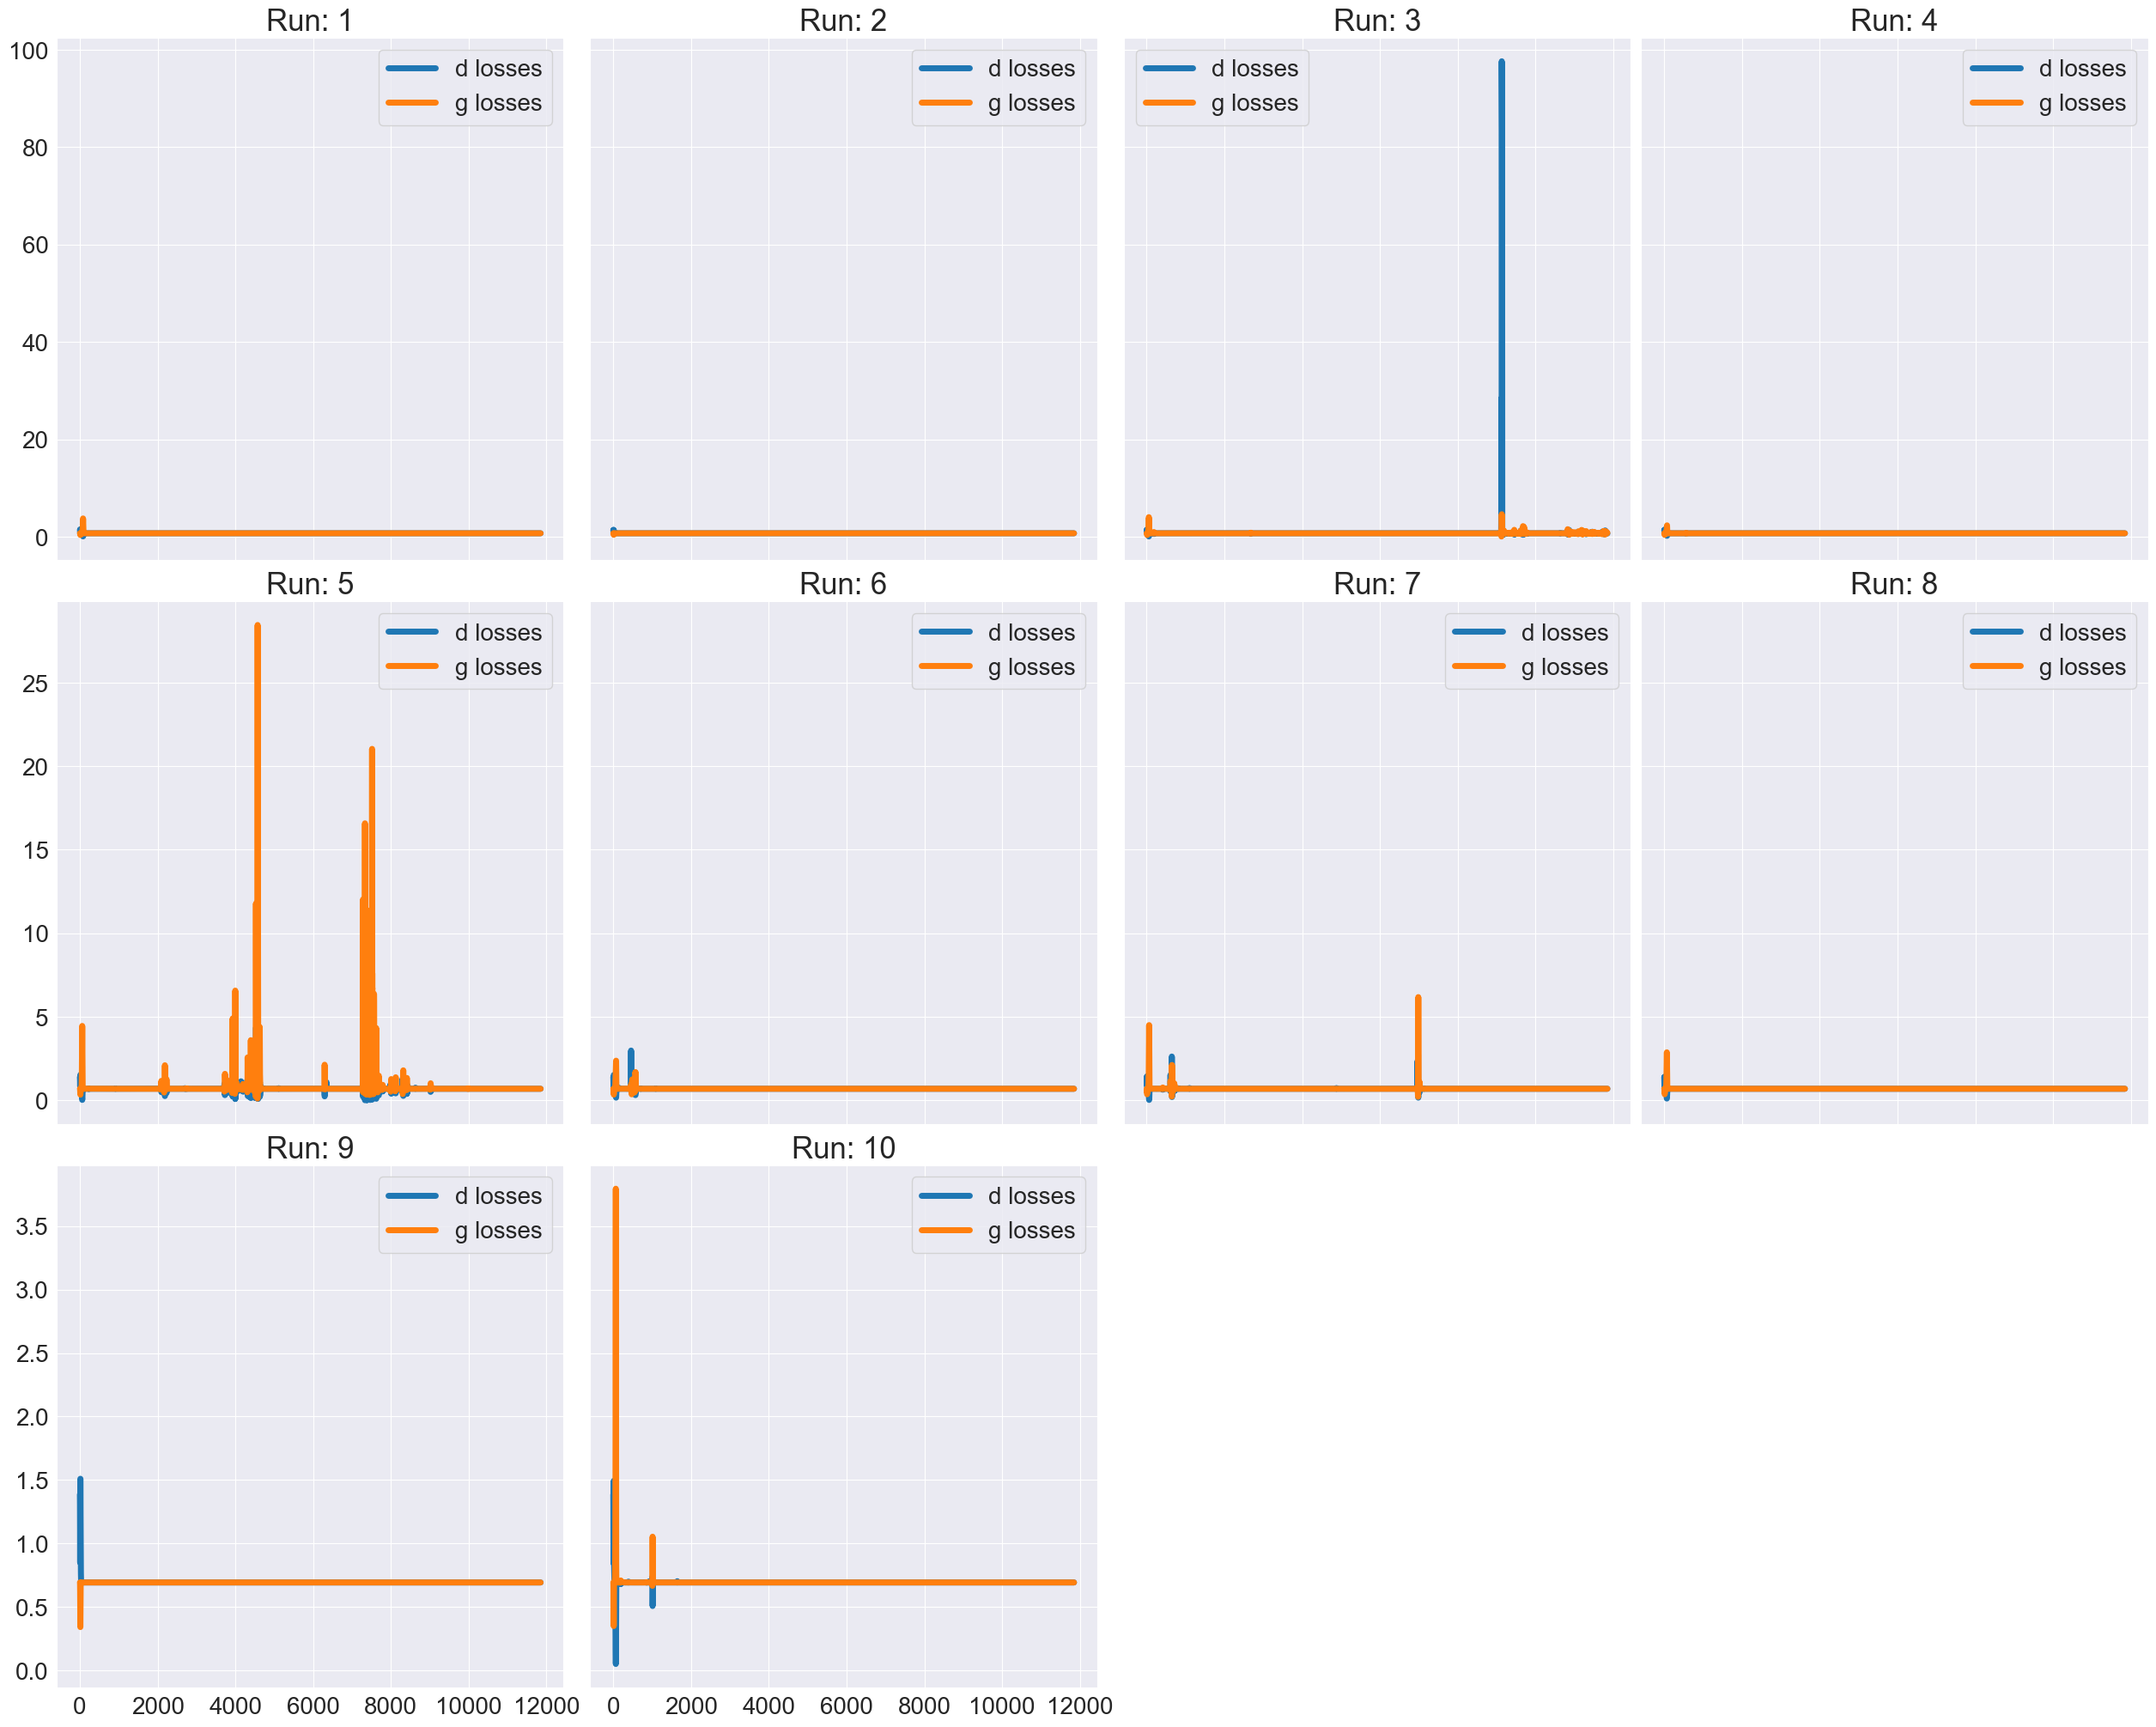

In [55]:
fig, ax = plt.subplots(3,4, figsize=(25,20), sharey='row', sharex='col', layout='constrained')
for i in range(len(res_df)):
    plot_run(res_df.iloc[i,2], f"Run: {res_df.iloc[i, 1]}", ax[i//4,i%4])
fig.delaxes(ax[2,2])
fig.delaxes(ax[2,3])
plt.show()

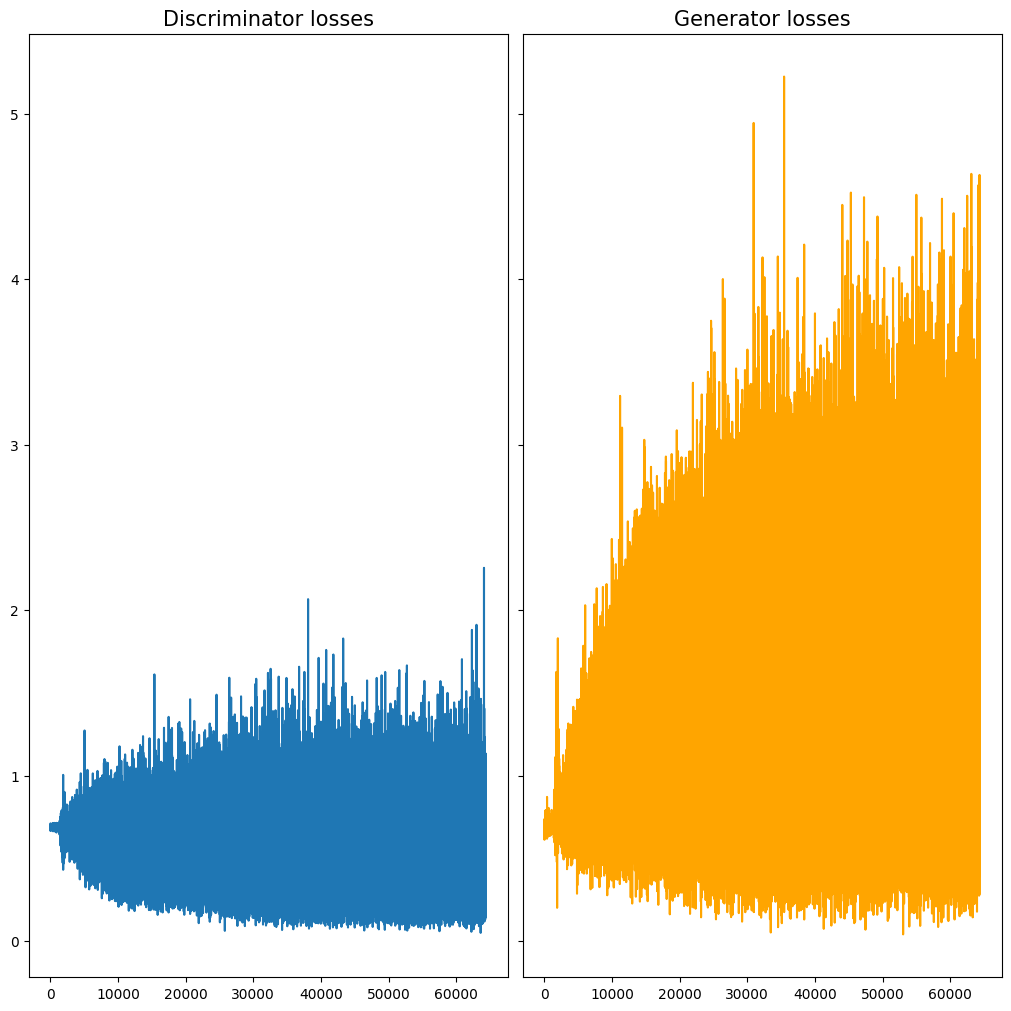

In [23]:
import ast
results = []
with open(path+"/"+'cdgan_trajectory.json') as f:
    for line in f.readlines():
        if line.startswith('['):
            results.append(ast.literal_eval(line[1:-2]))
        else:
            results.append(ast.literal_eval(line[:-2]))

df_cdgan = pd.DataFrame.from_records(results)
fig, ax = plt.subplots(1, 2, figsize=(10,10), layout='constrained', sharey='all')
ax[0].plot(df_cdgan['D loss'])
ax[0].set_title("Discriminator losses", fontsize=15)
ax[1].plot(df_cdgan['G loss'], c='orange')
ax[1].set_title("Generator losses", fontsize=15)
plt.show()

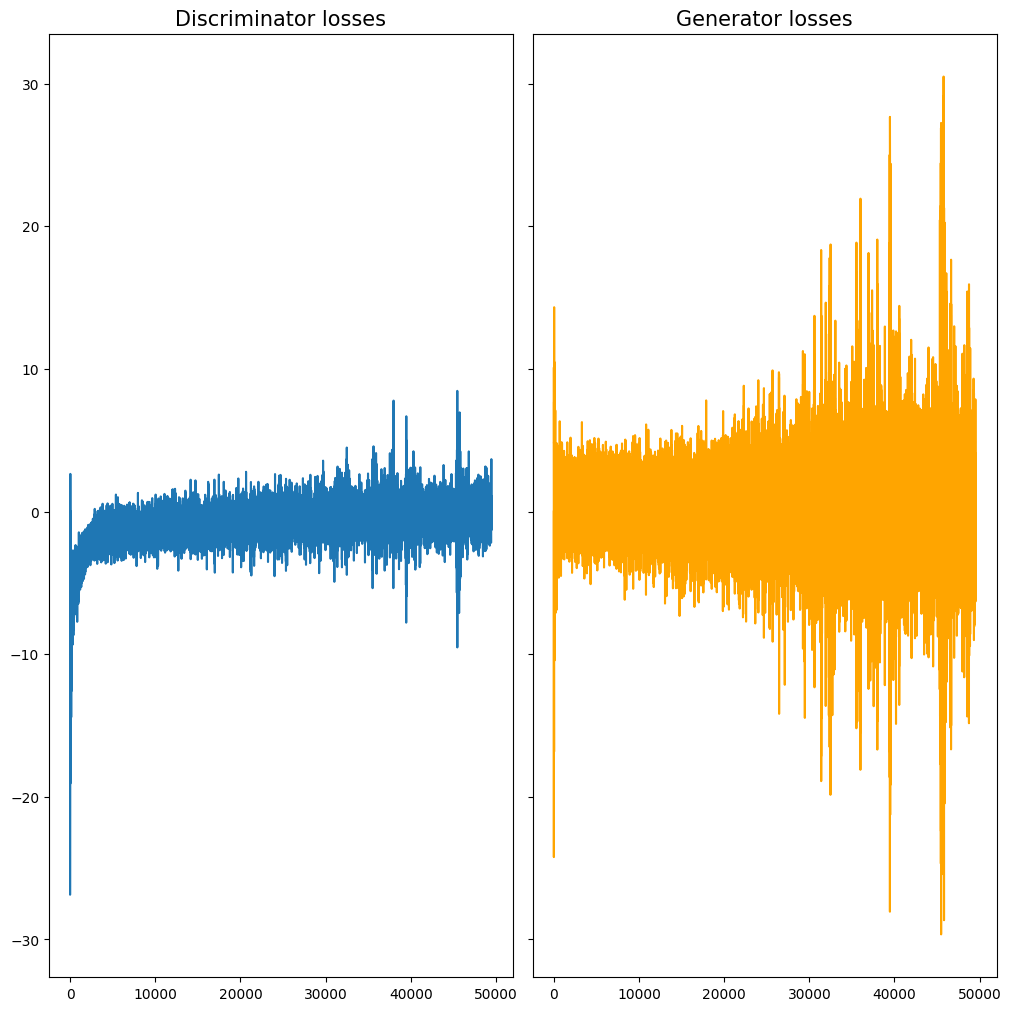

In [24]:
import ast
results = []
with open(path+"/"+'wgan_trajectory.json') as f:
    for line in f.readlines():
        if line.startswith('['):
            results.append(ast.literal_eval(line[1:-2]))
        else:
            results.append(ast.literal_eval(line[:-2]))

df_cdgan = pd.DataFrame.from_records(results)
fig, ax = plt.subplots(1, 2, figsize=(10,10), layout='constrained', sharey='all')
ax[0].plot(df_cdgan['D loss'])
ax[0].set_title("Discriminator losses", fontsize=15)
ax[1].plot(df_cdgan['G loss'], c='orange')
ax[1].set_title("Generator losses", fontsize=15)
plt.show()


In [45]:
from torch import nn
import torch
from torch import Tensor
from torch.autograd import Variable
import torch.nn.functional as F
import numpy as np
from torchvision.utils import save_image

In [36]:
generator = torch.load('experiments_gan/cdgan_generator_epoch_134.pt', map_location=torch.device('cpu'))

In [37]:
generator

Generator(
  (l1): Sequential(
    (0): Linear(in_features=100, out_features=32768, bias=True)
  )
  (conv_blocks): Sequential(
    (0): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Upsample(scale_factor=2.0, mode=nearest)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): BatchNorm2d(128, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Upsample(scale_factor=2.0, mode=nearest)
    (6): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(64, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (8): LeakyReLU(negative_slope=0.2, inplace=True)
    (9): Conv2d(64, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): Tanh()
  )
)

In [115]:
input1 = Tensor(np.random.normal(0,1,(1,100)))
input2 = Tensor(np.random.normal(0,1,(1,100)))

In [116]:
def interpolate(vec1, vec2, alpha):
    return (1 - alpha) * vec1 + alpha * vec2

In [117]:
alphas = np.linspace(0,1,10)

In [118]:
vectors = []
for alpha in alphas:
    vectors.append(interpolate(input1, input2, alpha))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

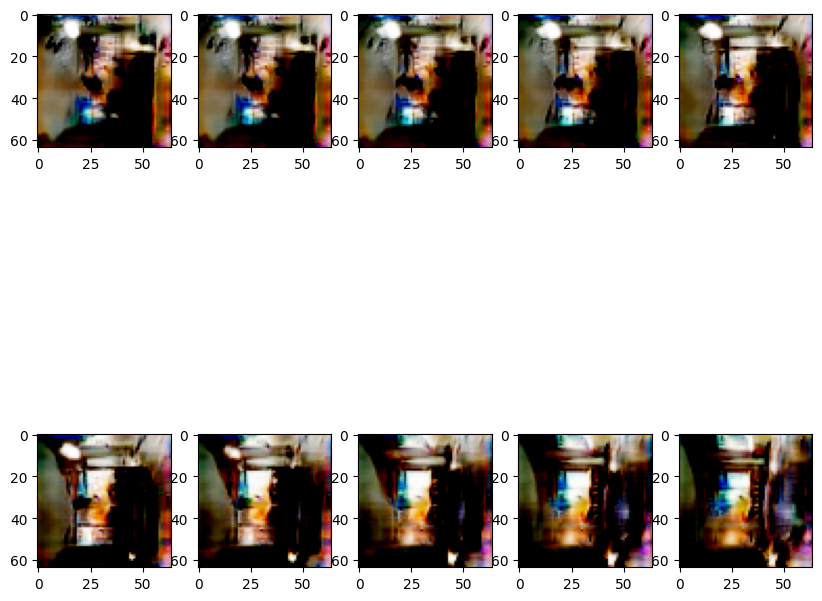

In [119]:
fig, axes = plt.subplots(2,5, figsize=(10,10))
for i, vector in enumerate(vectors):
    im = generator(vector)
    axes[i//5, i%5].imshow(im.data.T.squeeze())
plt.show()